In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from bnn_package import MSD, evolution_vec, MSD_inverse, find_settling_time
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import welch

In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.rcParams['figure.dpi'] = 150  # ou 200

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Computer Modern par défaut
    "font.serif": ["Computer Modern"],  # Facultatif, plus explicite
    "axes.labelsize": 14,
    "font.size": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

Define the 2 nodes graph

In [4]:
G = np.array([[0., 1.], [1., 0.]])
print(G)

[[0. 1.]
 [1. 0.]]


Define the parameters

In [5]:
N = 10000 #length of the run
Epsilon = np.linspace(0., 0.3, 1000)
b = 0.3
a_period = (0.6, 1.) #everyone periodic
a_chaos = (1.2, 1.4) #everyone chaotic
a_mixed = (0.8, 1.15) #mixed config

In [6]:
param_period = np.array([[a_period[0], a_period[1]], [b, b]])
param_chaos = np.array([[a_chaos[0], a_chaos[1]], [b, b]])
param_mixed = np.array([[a_mixed[0], a_mixed[1]], [b, b]])

Initialize initial condition

In [7]:
x0 = np.array([.5, .5])
y0 = np.array([.5, .5])

Make the data

In [8]:
data_period_x, data_period_y = np.zeros((N, len(x0), len(Epsilon))), np.zeros((N, len(y0), len(Epsilon)))

In [9]:
data_chaos_x, data_chaos_y = np.zeros((N, len(x0), len(Epsilon))), np.zeros((N, len(y0), len(Epsilon)))

In [10]:
data_mixed_x, data_mixed_y = np.zeros((N, len(x0), len(Epsilon))), np.zeros((N, len(y0), len(Epsilon)))

In [11]:
for i in tqdm(range(len(Epsilon))):
    data_period_x[:, :, i], data_period_y[:, :, i] = evolution_vec(
        x0, y0, N, param_period, Epsilon[i], G
    )

100%|██████████| 1000/1000 [00:05<00:00, 180.52it/s]


In [12]:
for i in tqdm(range(len(Epsilon))):
    data_chaos_x[:, :, i], data_chaos_y[:, :, i] = evolution_vec(
        x0, y0, N, param_chaos, Epsilon[i], G
    )

100%|██████████| 1000/1000 [00:03<00:00, 257.55it/s]


In [13]:
for i in tqdm(range(len(Epsilon))):
    data_mixed_x[:, :, i], data_mixed_y[:, :, i] = evolution_vec(
        x0, y0, N, param_mixed, Epsilon[i], G
    )

100%|██████████| 1000/1000 [00:03<00:00, 253.12it/s]


X and Y functions of time

In [14]:
np.shape(data_chaos_x)

(10000, 2, 1000)

In [24]:
indexeps=100
size_erased = 0.8
transition = int(N*size_erased)
epsilon = Epsilon[indexeps]

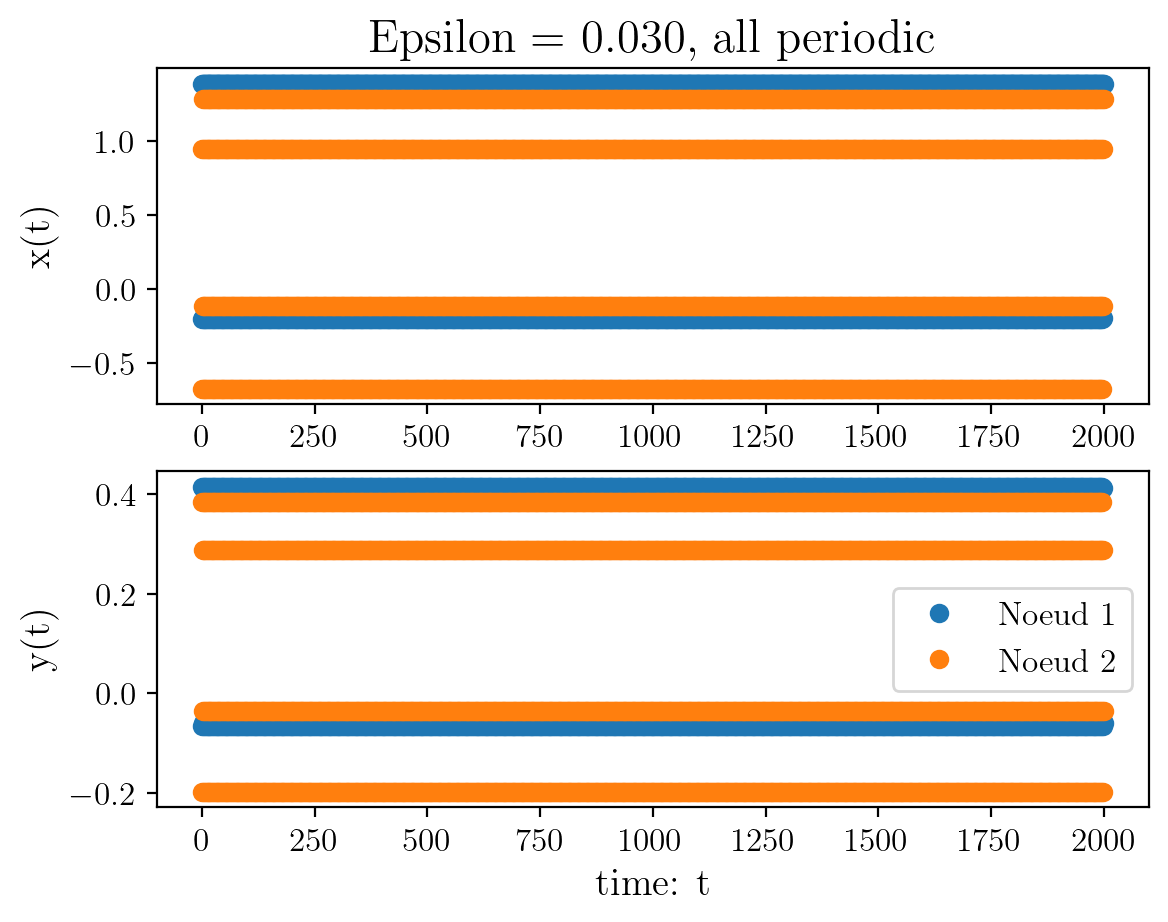

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_period_x[transition:, 0, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_period_x[transition:, 1, indexeps], 'o', label="Noeud 2")
#ax[0].plot(np.mean(data_period_x[transition:, :, indexeps], axis=1), 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title("Epsilon = {eps:.3f}, all periodic".format(eps=Epsilon[indexeps]))
ax[1].plot(data_period_y[transition:, 0, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_period_y[transition:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")

plt.legend()
plt.show()

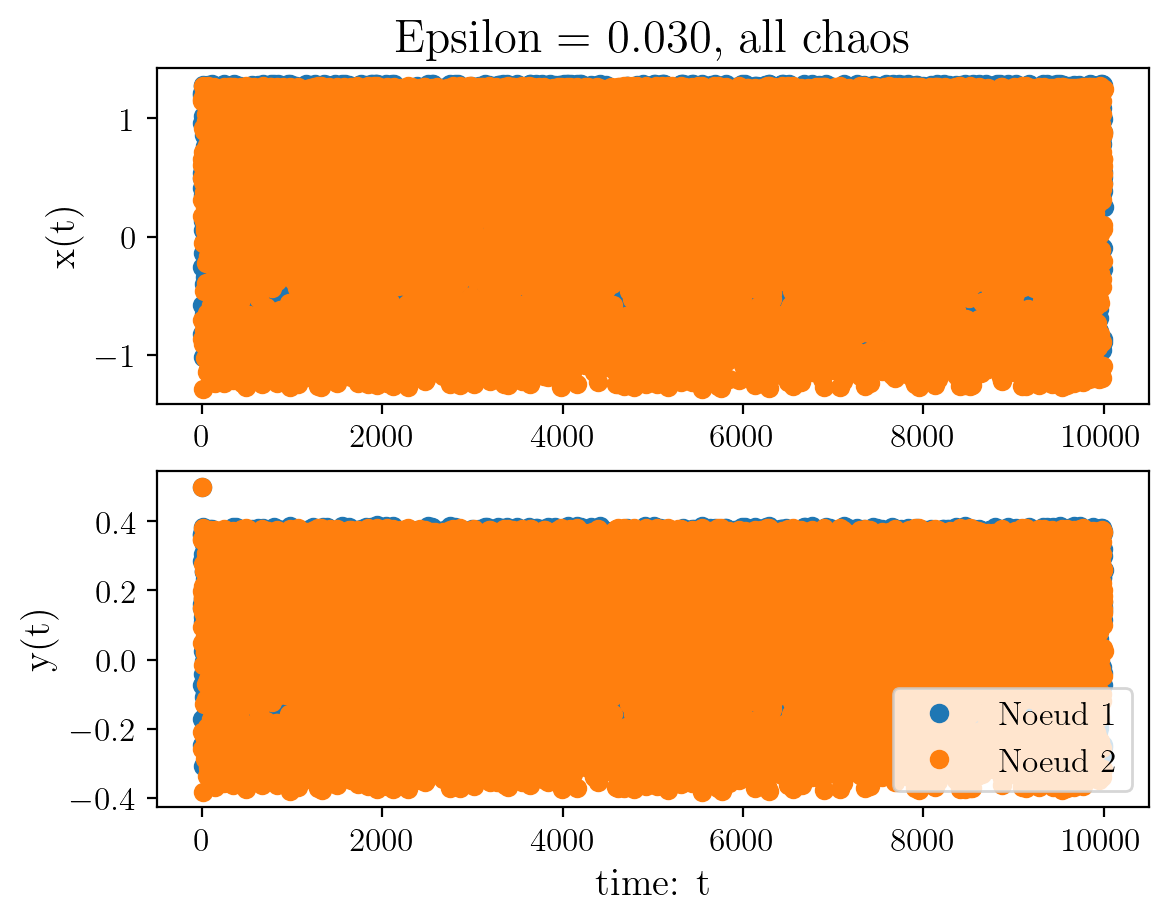

In [17]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_chaos_x[:, 0, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_chaos_x[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title("Epsilon = {eps:.3f}, all chaos".format(eps=Epsilon[indexeps]))
ax[1].plot(data_chaos_y[:, 0, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_chaos_y[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")
plt.legend()
plt.show()

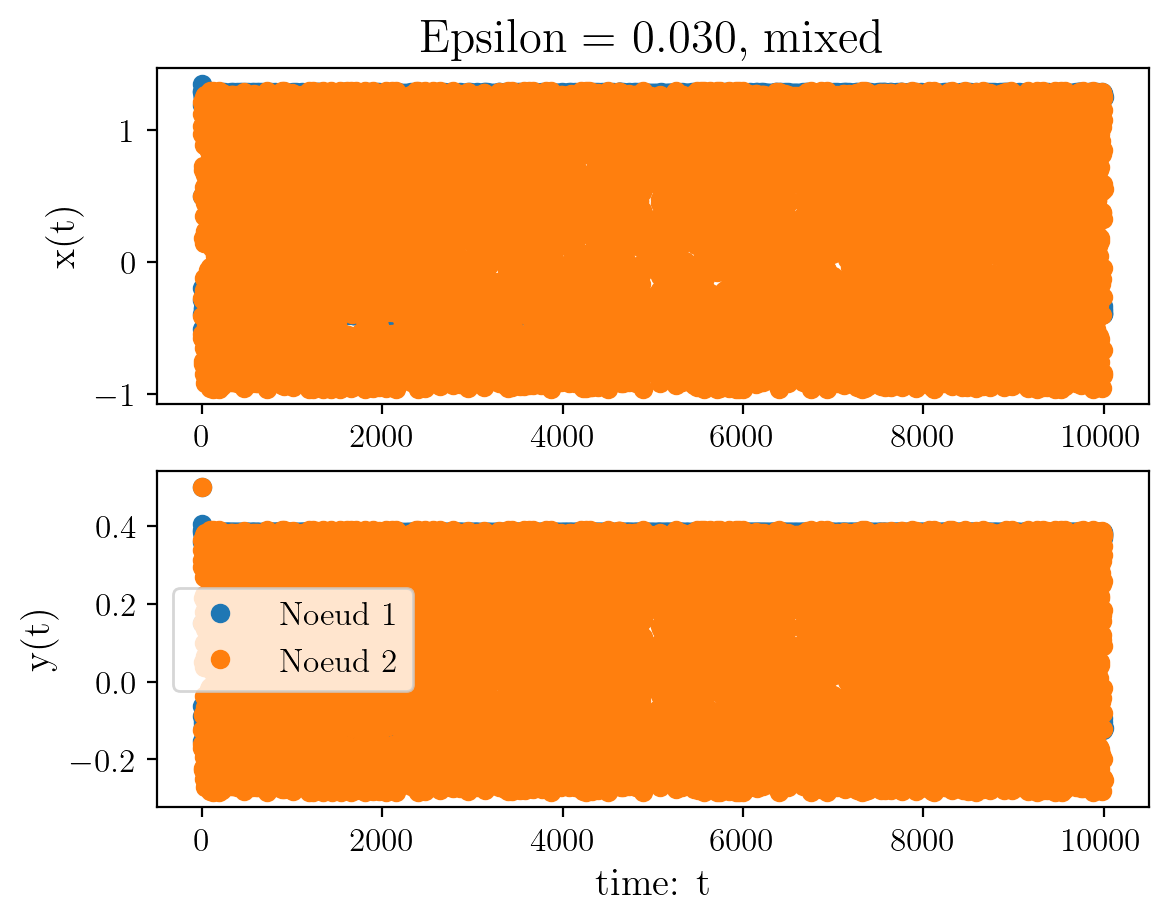

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data_mixed_x[:, 0, indexeps], 'o', label="Noeud 1")
ax[0].plot(data_mixed_x[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_xlabel("time: t")
ax[0].set_ylabel(r"x(t)")
ax[0].set_title("Epsilon = {eps:.3f}, mixed".format(eps=Epsilon[indexeps]))
ax[1].plot(data_mixed_y[:, 0, indexeps], 'o', label="Noeud 1")
ax[1].plot(data_mixed_y[:, 1, indexeps], 'o', label="Noeud 2")
ax[1].set_ylabel(r"y(t)")
plt.legend()
plt.show()

Try to study the transitory regime

In [20]:
data_x = np.mean(data_period_x, axis=1)
data_y = np.mean(data_period_x, axis=1)

times_x = []
times_y = []

for i in range(len(Epsilon)):
    times_x.append(find_settling_time(data_x[:,i], 1000))
    times_y.append(find_settling_time(data_y[:,i], 1000))

One way to detect periodicity is through Fourier transform

In [19]:
power = welch(data_period_x[:, 1, indexeps], fs=1/N, nperseg=512, scaling='spectrum')

In [20]:
print(np.shape(power))

(2, 257)


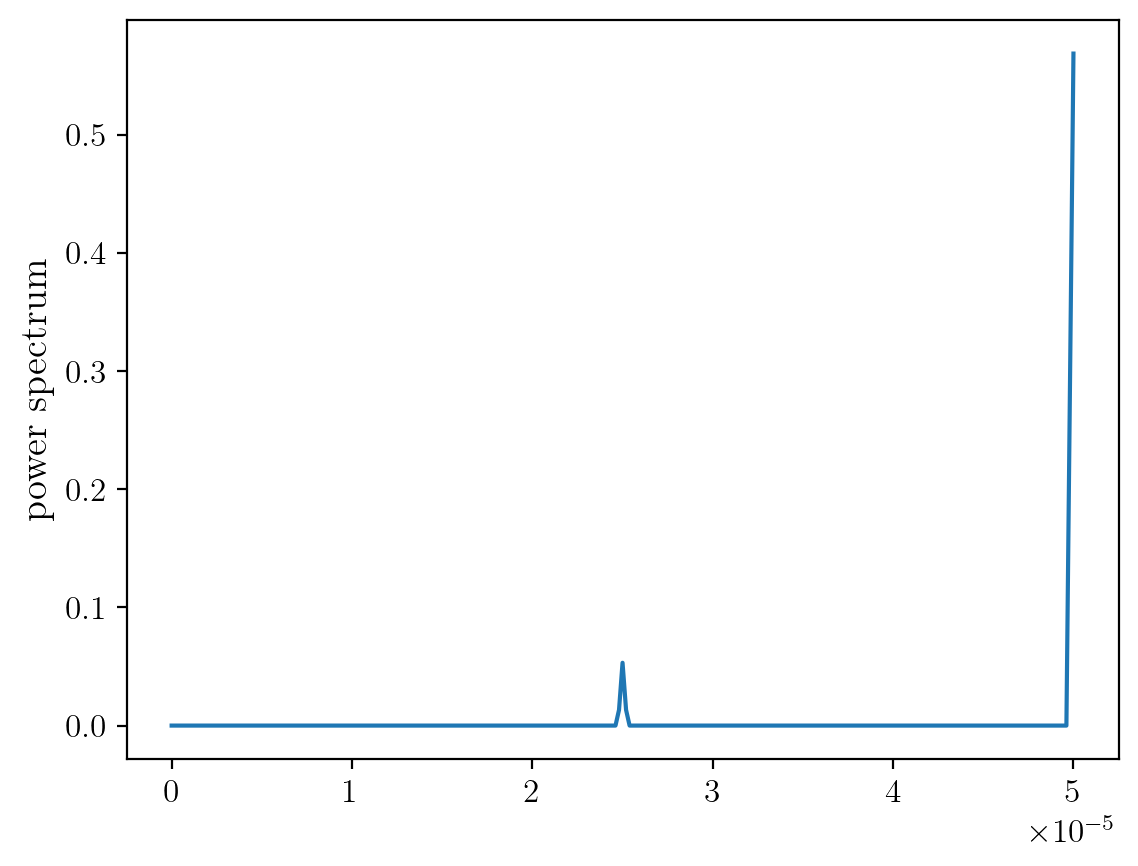

In [21]:
fig, ax = plt.subplots()
ax.plot(power[0], power[1])
ax.set_ylabel("power spectrum")
plt.show()

The transition with MSD

In [43]:
msd_mixed_x, msd_mixed_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [44]:
msd_chaos_x, msd_chaos_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [45]:
msd_period_x, msd_period_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [46]:
msd_period_time_x, msd_period_time_y = np.zeros((N, len(Epsilon))), np.zeros((N, len(Epsilon)))

In [47]:
for i in tqdm(range(len(Epsilon))):
    msd_period_x[i], msd_period_y[i] = (
        MSD(G, data_period_x[:, :, i]),
        MSD(G, data_period_y[:, :, i]),
    )

100%|██████████| 1000/1000 [00:00<00:00, 2079.19it/s]


In [52]:
for i in tqdm(range(len(Epsilon))):
    msd_mixed_x[i], msd_mixed_y[i] = (
        MSD(G, data_mixed_x[:, :, i]),
        MSD(G, data_mixed_y[:, :, i]),
    )

100%|██████████| 1000/1000 [00:00<00:00, 2026.64it/s]


In [49]:
for i in tqdm(range(len(Epsilon))):
    msd_period_time_x[:, i], msd_period_time_y[:, i] = (
        MSD(G, data_period_x[:, :, i], average=False),
        MSD(G, data_period_y[:, :, i], average=False),
    )

100%|██████████| 1000/1000 [00:00<00:00, 1862.49it/s]


In [50]:
for i in tqdm(range(len(Epsilon))):
    msd_chaos_x[i], msd_chaos_y[i] = (
        MSD(G, data_chaos_x[:, :, i]),
        MSD(G, data_chaos_y[:, :, i]),
    )

100%|██████████| 1000/1000 [00:00<00:00, 2122.77it/s]


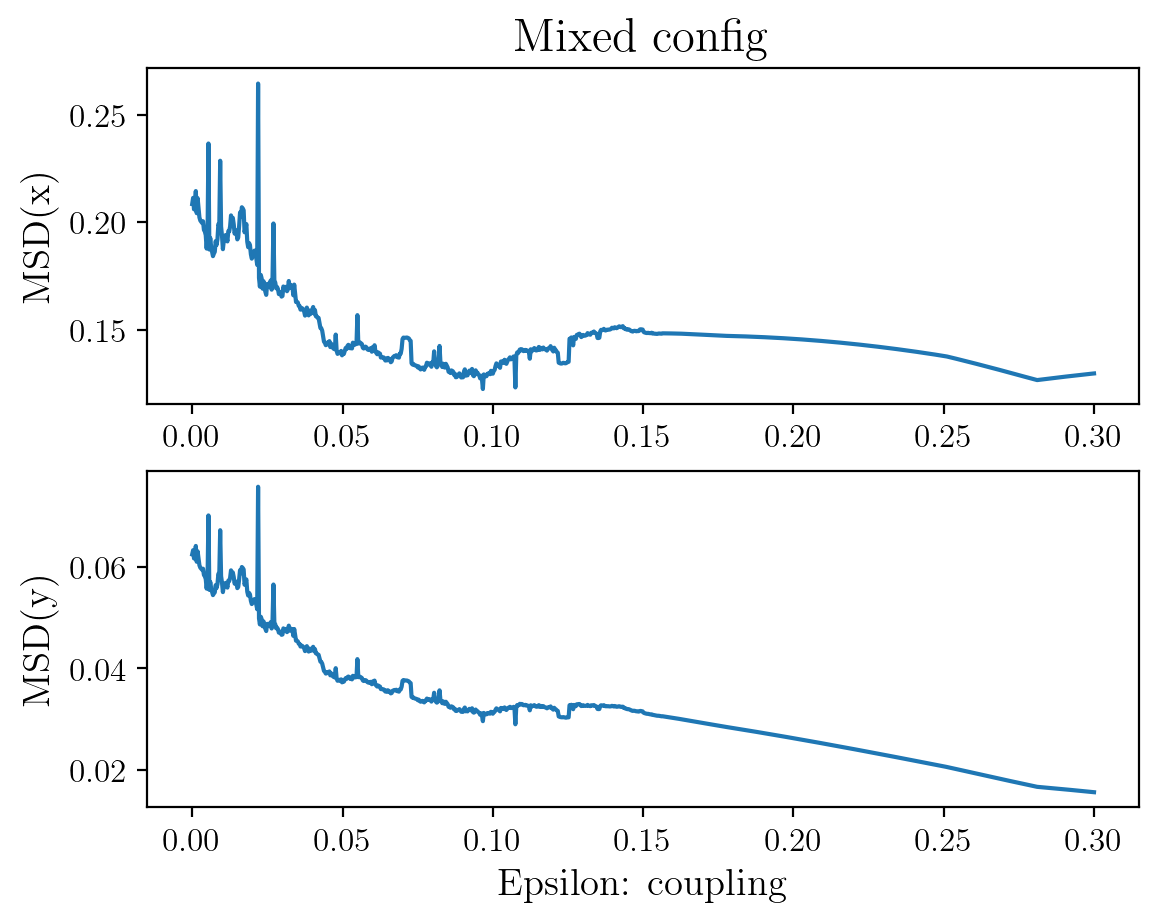

In [53]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Epsilon,msd_mixed_x)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Mixed config")
ax[1].plot(Epsilon,msd_mixed_y)
ax[1].set_ylabel("MSD(y)")
plt.show()

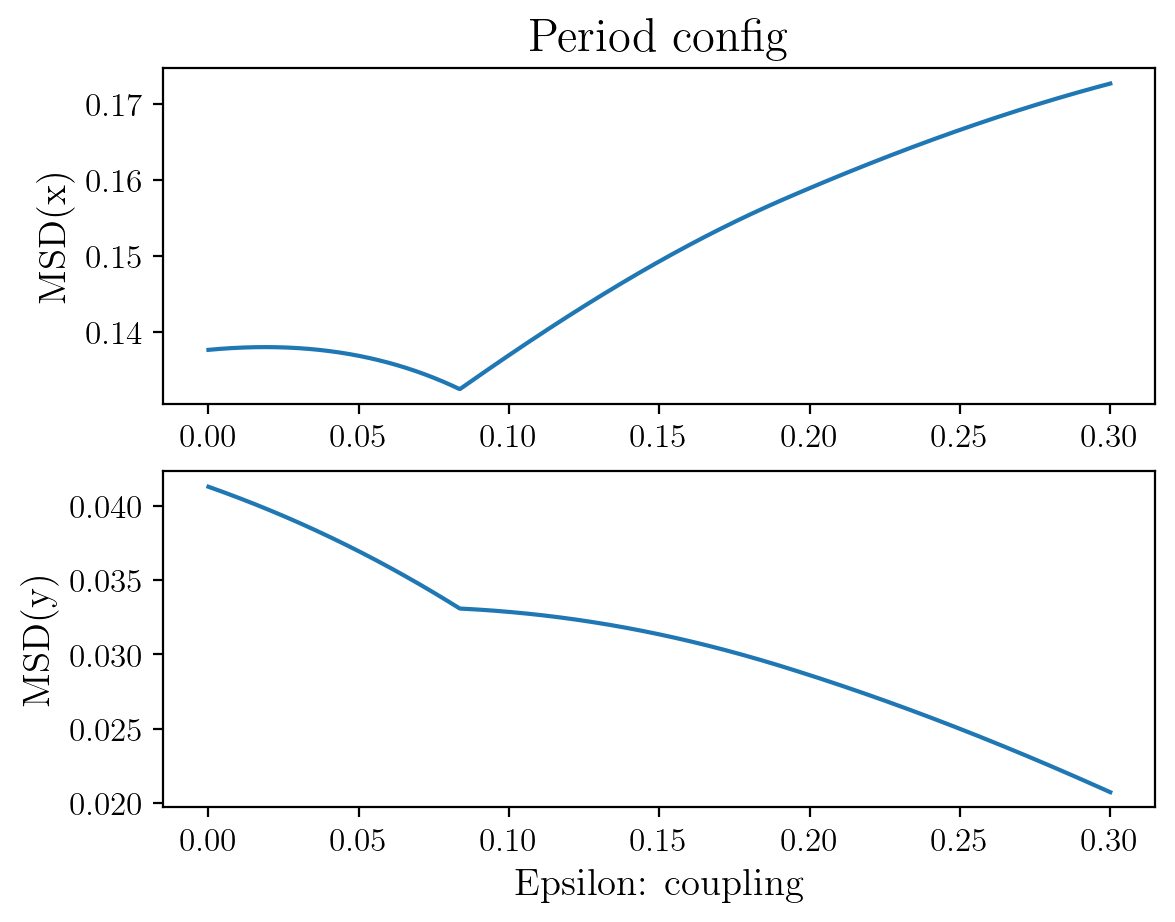

In [54]:
fig, ax = plt.subplots(2,1)
ax[0].plot(Epsilon,msd_period_x)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Period config")
ax[1].plot(Epsilon,msd_period_y)
ax[1].set_ylabel("MSD(y)")
plt.show()

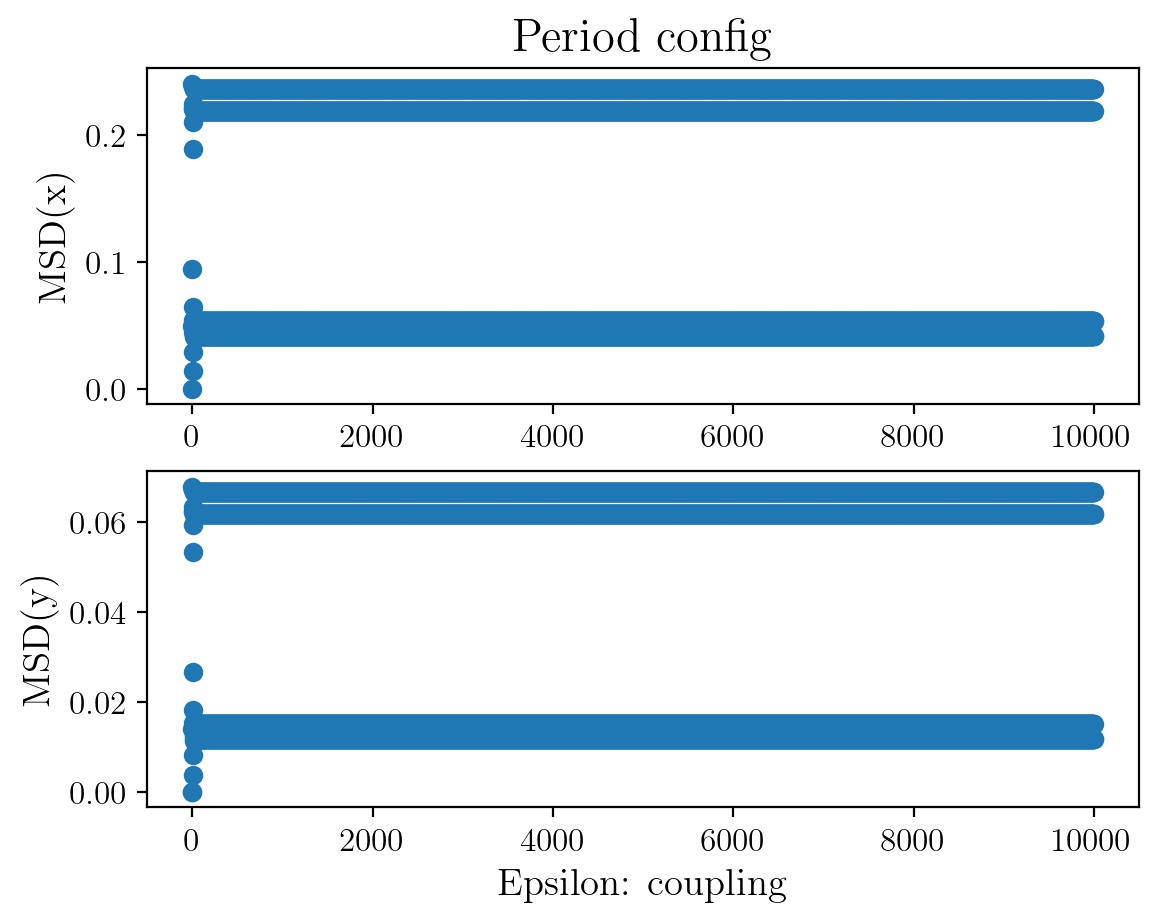

In [55]:
fig, ax = plt.subplots(2,1)
ax[0].plot(msd_period_time_x[:, indexeps], 'o')
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Period config")
ax[1].plot(msd_period_time_y[:, indexeps], 'o')
ax[1].set_ylabel("MSD(y)")
plt.show()

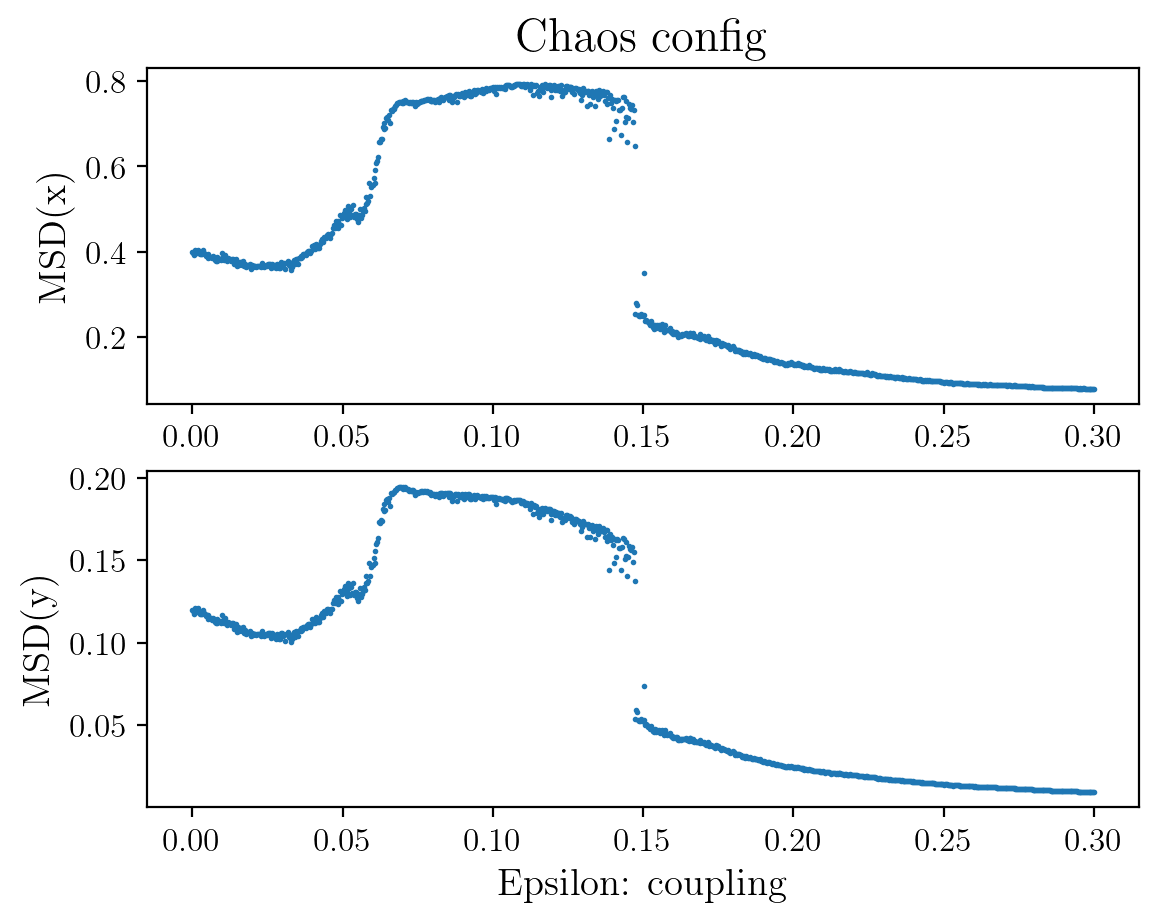

In [56]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(Epsilon,msd_chaos_x, s=1)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD(x)")
ax[0].set_title("Chaos config")
ax[1].scatter(Epsilon,msd_chaos_y, s=1)
ax[1].set_ylabel("MSD(y)")
plt.show()

Those plots tend to think focus on chaotic configuration is enough

In [176]:
msd_reversed_chaos_x, msd_reversed_chaos_y = np.zeros(len(Epsilon)), np.zeros(len(Epsilon))

In [ ]:
for i in tqdm(range(len(Epsilon))):
    msd_reversed_chaos_x[i], msd_reversed_chaos_y[i] = (
        MSD_inverse(G, data_chaos_x[:, :, i], axe=1),
        MSD_inverse(G, data_chaos_y[:, :, i], axe=1),
    )

100%|██████████| 10000/10000 [00:00<00:00, 28841.14it/s]


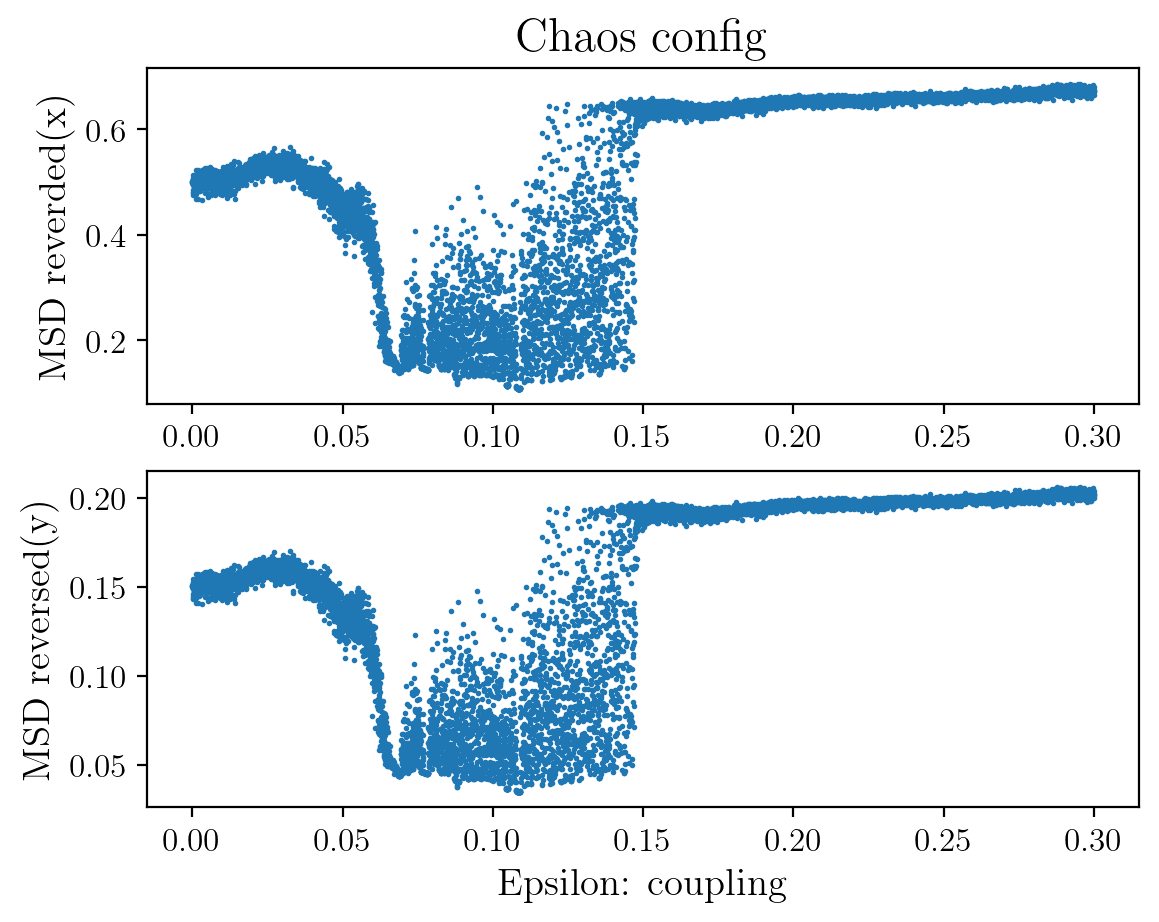

In [178]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(Epsilon,msd_reversed_chaos_x, s=1)
ax[1].set_xlabel("Epsilon: coupling")
ax[0].set_ylabel("MSD reverded(x)")
ax[0].set_title("Chaos config")
ax[1].scatter(Epsilon,msd_reversed_chaos_y, s=1)
ax[1].set_ylabel("MSD reversed(y)")
plt.show()

It looks like there are transitions for every msd

Lets study the dependence in the initial states

In [74]:
X0_list = np.arange(-3., 3., 0.05)
Y0_list = np.arange(-3., 7., 0.05)

In [75]:
dataX = np.zeros((len(X0_list), len(Y0_list)))
dataY = np.zeros((len(X0_list), len(Y0_list)))
for i in range(len(X0_list)):
    for j in range(len(Y0_list)):
        # Create initial conditions for both nodes
        x0_both = np.array([X0_list[i], X0_list[i]])  # Same initial x for both nodes
        y0_both = np.array([Y0_list[j], Y0_list[j]])  # Same initial y for both nodes
        dataX_point, dataY_point = evolution_vec(
            x0_both, y0_both, N, param_period, epsilon, G
        )
        dataX[i, j], dataY[i, j] = np.mean(dataX_point[-1]), np.mean(dataY_point[-1])

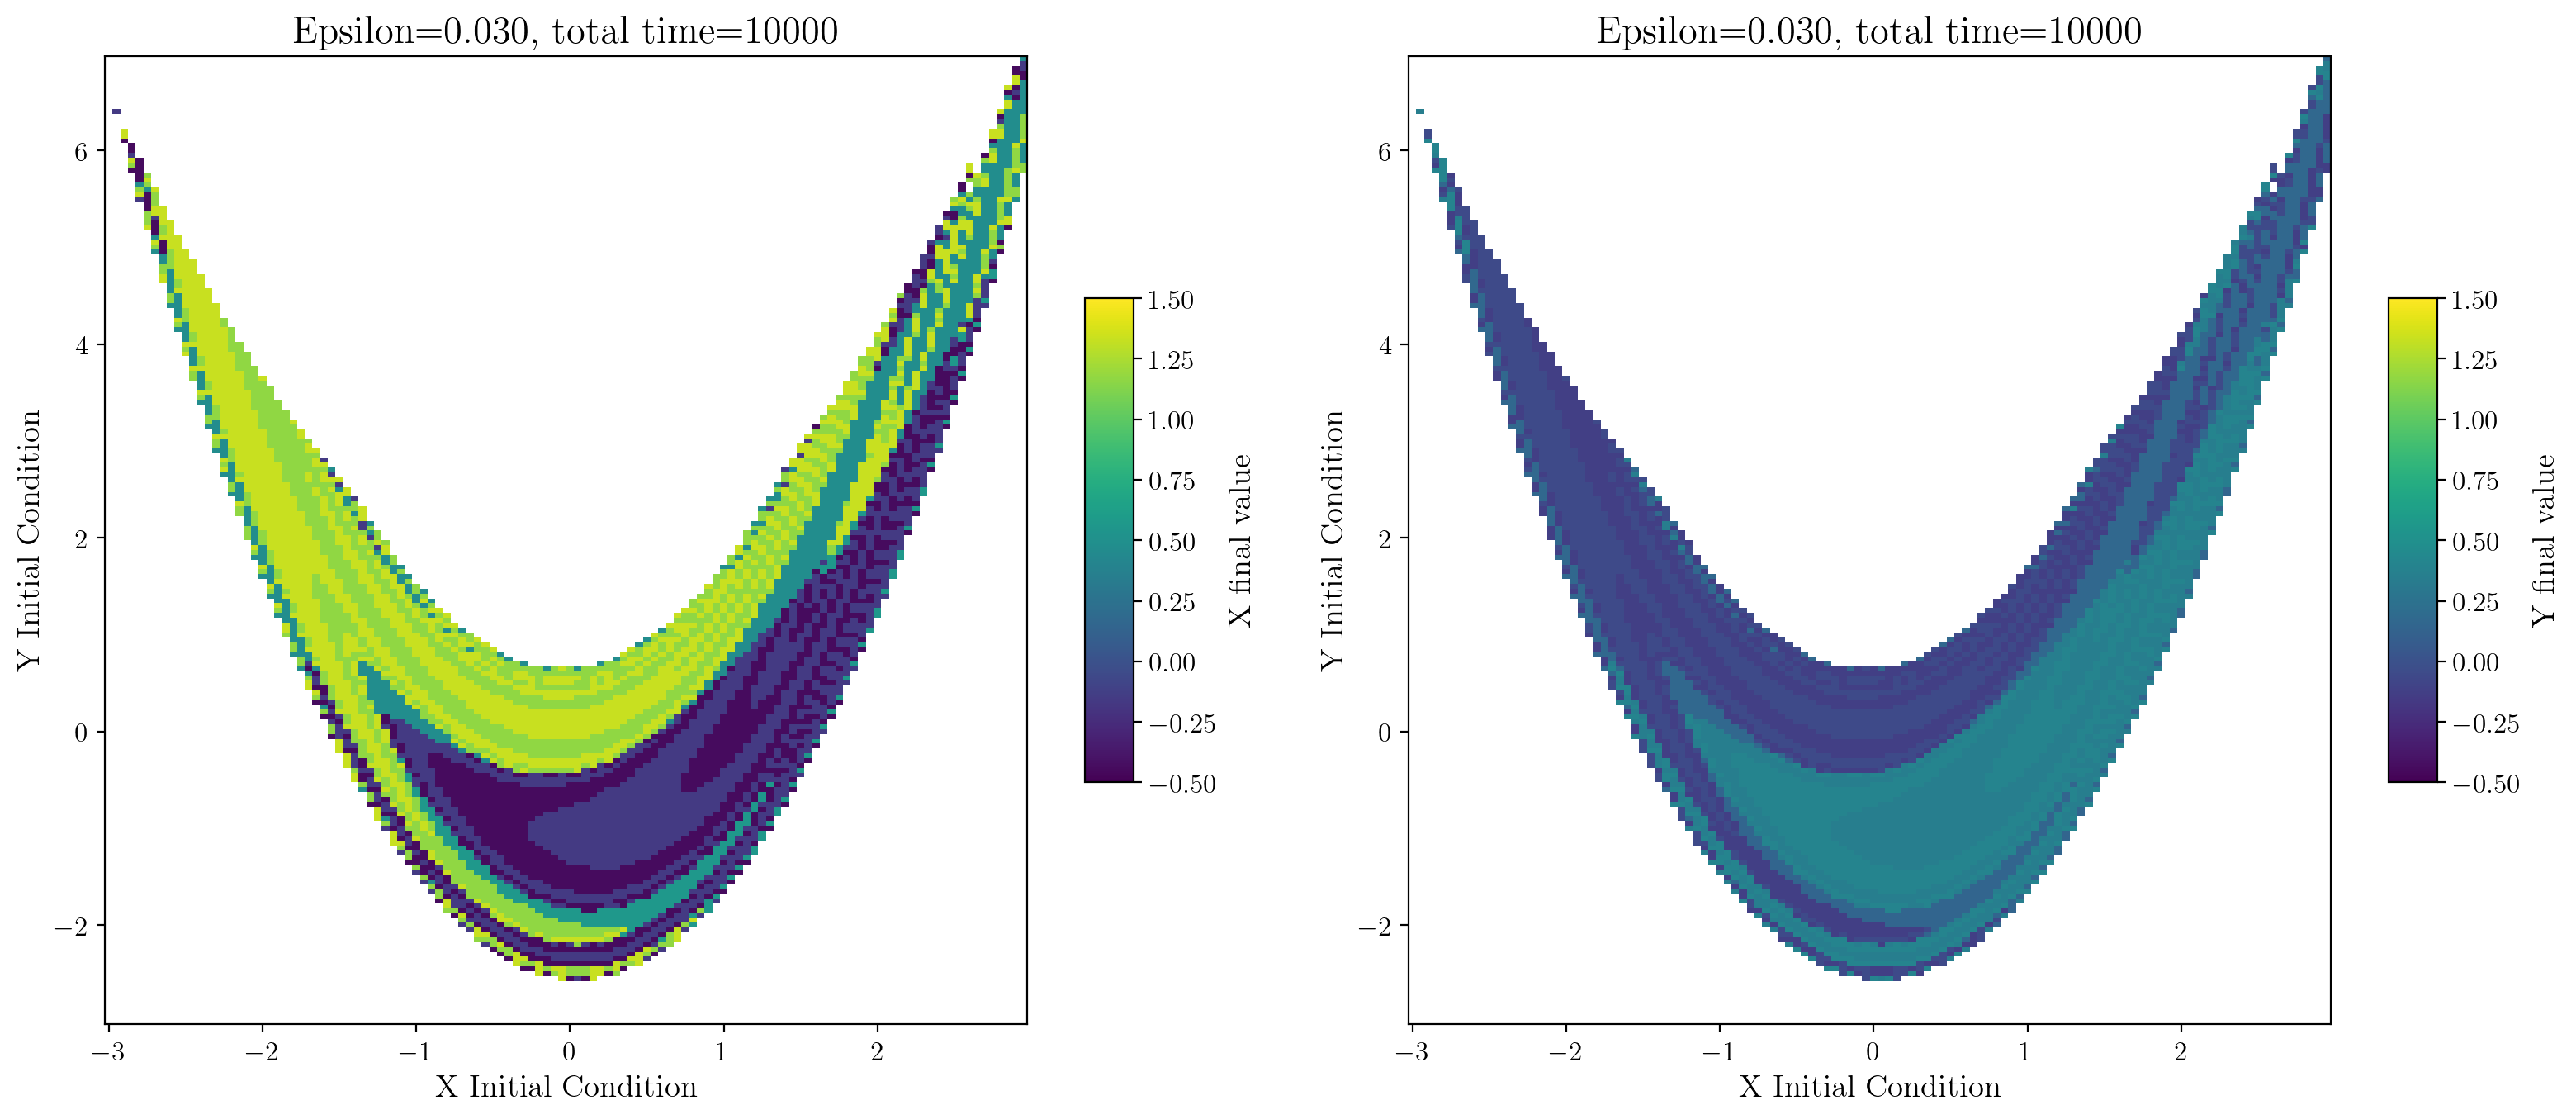

In [76]:
X0, Y0 = np.meshgrid(X0_list, Y0_list, indexing='ij')
fig, axs = plt.subplots(
    1, 2, # 1 row, 2 columns
    figsize=(16, 7), 
)
surf1 = axs[0].pcolormesh(X0, Y0, dataX, vmin=-0.5, vmax=1.5, cmap='viridis', shading='auto')
axs[0].set_xlabel('X Initial Condition')
axs[0].set_ylabel('Y Initial Condition')
axs[0].set_title("Epsilon={eps:.3f}, total time={N}".format(eps=epsilon, N=N))
fig.colorbar(surf1, ax=axs[0], shrink=0.5, aspect=10, label='X final value')

# Transpose dataY to match meshgrid dimensions
surf2 = axs[1].pcolormesh(X0, Y0, dataY, vmin=-0.5, vmax=1.5, cmap='viridis', shading='auto')
axs[1].set_xlabel('X Initial Condition')
axs[1].set_ylabel('Y Initial Condition')
axs[1].set_title("Epsilon={eps:.3f}, total time={N}".format(eps=epsilon, N=N))
fig.colorbar(surf2, ax=axs[1], shrink=0.5, aspect=10, label='Y final value')

# --- 7. Adjust Layout and Show Plot ---
plt.tight_layout()

plt.show()